#  **E-Commerce Shipping Data Python Exercise**

# Import Library & Read Dataset

In [937]:
#Import Library
import warnings
# warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import numpy as np
import plotly.figure_factory as ff

from plotly.subplots import make_subplots
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, average_precision_score, confusion_matrix
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

In [938]:
#Visualization plot settings
sns.set(rc={'figure.figsize':(10,5)})
sns.set_style('whitegrid')
sns.color_palette('viridis')
plt.style.use('seaborn-bright')

C:\Users\DGRSZOMBIE315\AppData\Local\Temp\ipykernel_13912\4125407537.py:5: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



In [939]:
#read dataset
df = pd.read_csv('Train.csv')
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


# Exploratory Data Analysis

In [940]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


| Variable | Type | Definition | Example |
| ----------- | ----------- | ----------- | ----------- |
| ID | Nominal | ID Number of Customers | 10995, 10996, etc. Has no calculation meaning
| Warehouse_block | Nominal | Warehouse where goods are being processed for deliveries  | A, B, C, D, F
| Mode_of_Shipment | Nominal | Transportation that used for deliveries. | Flight, Road, Ship
| Customer_care_calls | Discrete | The number of calls made from enquiry for enquiry of the shipment. | 1, 2, 5, etc.
| Customer_rating | Ordinal | Rating that given from the customer to the company | 1 is the lowest (Worst), 5 is the highest (Best) best - better - neutral - bad - worst
| Cost_of_the_Product | Discrete | Price of product in USD | 177, 216
| Prior_purchases | Discrete | Recent trx made by the customer | 3, 2, 6
| Product_importance | Ordinal | Importance level of the goods | Low, Medium, High
| Gender | Nominal | Gender | Male, Female
| Discount_offered | Discrete | Discount offered on that specific product. | 65, 10, 16
| Weight_in_gms | Continous | Weight of the goods in grams | 4953
| Reached.on.Time_Y.N | Nominal | Target Variable,1= NOT reached on time, 0 = REACHED on time | 1, 0

In [941]:
df.sample(10)

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
6604,6605,C,Ship,6,3,295,4,low,F,10,1495,0
1326,1327,D,Ship,3,1,255,5,low,F,1,2713,1
10767,10768,B,Ship,4,2,258,5,medium,F,1,1010,0
5551,5552,F,Ship,3,5,253,3,medium,M,9,5979,1
4773,4774,B,Road,6,3,274,6,medium,F,1,4632,0
8591,8592,F,Ship,4,4,144,8,medium,M,6,4390,1
6592,6593,C,Flight,7,4,272,4,low,M,3,1805,0
7681,7682,F,Flight,5,3,254,2,medium,F,5,4764,1
7079,7080,F,Ship,3,5,221,3,medium,M,7,4741,1
7643,7644,F,Ship,3,2,189,2,medium,F,4,4160,0


In [942]:
#change column name
df.rename(columns={'ID' : 'ID', 'Warehouse_block' : 'warehouse_block', 'Mode_of_Shipment' : 'shipment_type', 
                   'Customer_care_calls' : 'cust_care_calls', 'Customer_rating' : 'rating', 'Cost_of_the_Product' : 'cost_of_prod', 
                   'Prior_purchases' : 'prior_purchases', 'Product_importance' : 'prod_importance', 'Gender' : 'gender', 
                   'Discount_offered' : 'discount_offered', 'Weight_in_gms' : 'weight_gms', 'Reached.on.Time_Y.N' : 'late'}, inplace = True)

## Numerical Approach

In [943]:
#Changing Data Type
df = df.astype({'ID' : object})

In [944]:
#Dividing Column name based on data type for easier descriptive analysis

nums = df.select_dtypes(include=['number']).columns
cats = df.select_dtypes(include=['object', 'category']).drop(columns=['ID']).columns

In [945]:
df[cats].describe()

,warehouse_block,shipment_type,prod_importance,gender
count,10999,10999,10999,10999
unique,5,3,3,2
top,F,Ship,low,F
freq,3666,7462,5297,5545


In [946]:
df[nums].describe()

,cust_care_calls,rating,cost_of_prod,prior_purchases,discount_offered,weight_gms,late
count,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


### Univariate Analysis

#### Boxplot

In [947]:
fig = make_subplots(rows=1, cols=len(nums))

for i, column in enumerate(nums, start=1):
    fig.add_trace(go.Box(y=df[column], name=column), row=1, col=i)

fig.update_layout(height=600, width=150*len(nums), title_text='Box Plots of Numerical Columns')

#### KDE PLOT

In [948]:
nums_required = len(nums)
rows_required = (nums_required + 1) // 2

fig = make_subplots(rows=rows_required, cols=2, subplot_titles=nums)
# fig.print_grid

for i, column in enumerate(nums, start=1):

    row = (i + 1) //2
    col = 1 if i % 2 != 0 else 2

    hist_data = [df[column].values]
    group_labels = [column]

    kde_fig = ff.create_distplot(hist_data, group_labels, show_hist=False, show_rug=False)

    kde_line = kde_fig['data'][0]
    fig.add_trace(go.Scatter(x=kde_line.x, y=kde_line.y, name=column, mode='lines'), col=col, row=row)

fig.update_layout(height=1200, width=300*len(nums), title_text='KDE Plots of Numerical Columns')

#### Countplot

In [949]:
cats_required = len(cats)
rows_required = (cats_required + 1) // 2

fig = make_subplots(rows=rows_required, cols=2, subplot_titles=cats)

for i, column in enumerate(cats, start=1):
    row = (i + 1) // 2
    col = 1 if i % 2 != 0 else 2

    counts = df[column].value_counts()
    total = counts.sum()
    percentages = (counts/total*100).round(2)

    hist = go.Histogram(
        x=df[column],
        name =column,
        histfunc='count',
        text=percentages.apply(lambda x: f'{x}%'),
        textposition='inside'
    )

    fig.add_trace(hist, row=row, col=col)

fig.update_layout(height=1200, width=300*len(cats), title_text='Count Plots of Categorical Columns')
fig.update_traces(marker_line_color='black', marker_line_width=1.5)


for i in range(rows_required * 2):
    fig.update_yaxes(title_text="Count", row=i//2+1, col=i%2+1)
    fig.update_xaxes(title_text=cats[i] if i < len(cats) else '', row=i//2+1, col=i%2+1)

fig.show()



### Multivariate Analysis

#### Histplot

C:\Users\DGRSZOMBIE315\AppData\Local\Temp\ipykernel_13912\596916312.py:7: UserWarning:

The figure layout has changed to tight

C:\Users\DGRSZOMBIE315\AppData\Local\Temp\ipykernel_13912\596916312.py:7: UserWarning:

The figure layout has changed to tight



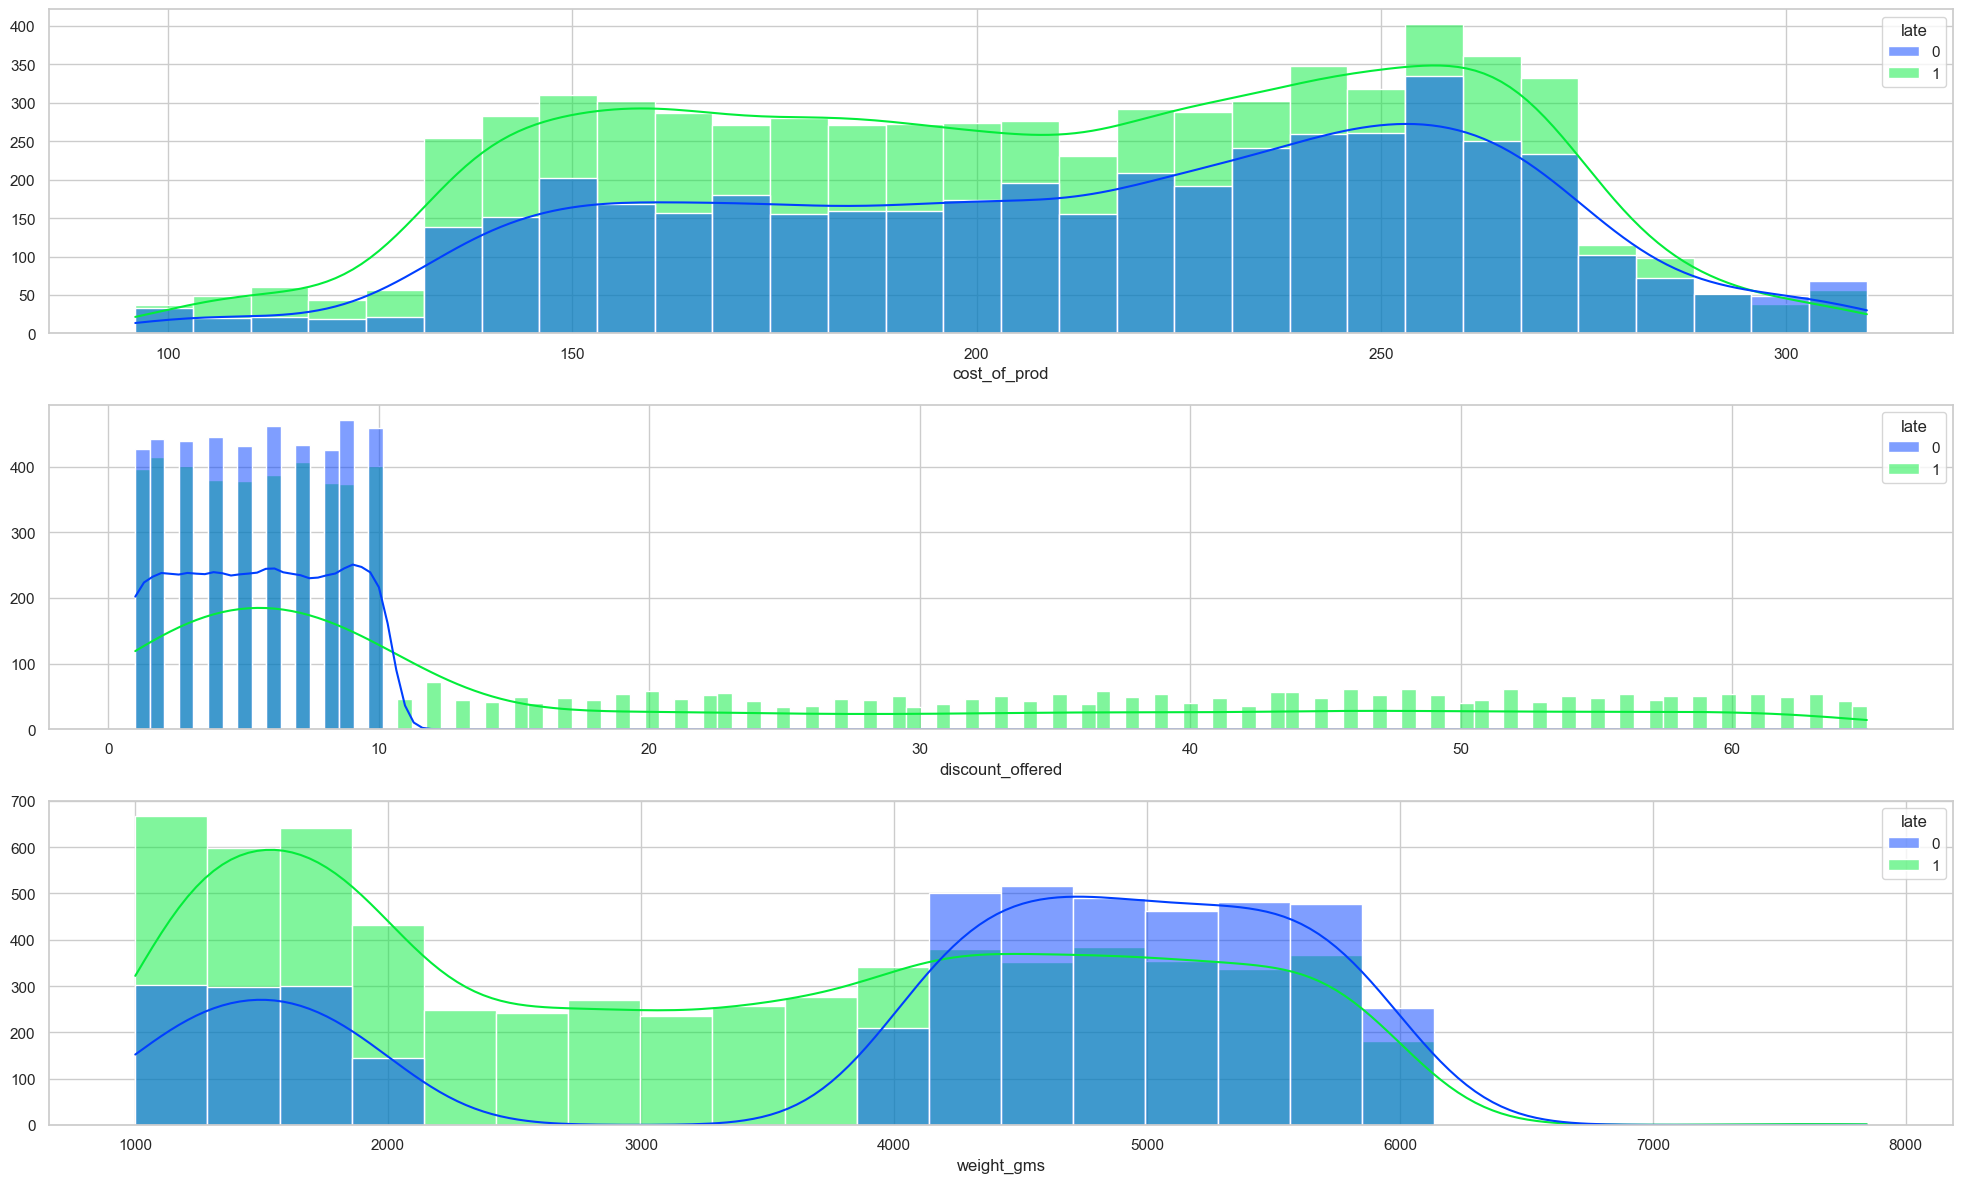

In [950]:
variables = ['cost_of_prod', 'discount_offered', 'weight_gms']

plt.figure(figsize=(20, 12))
for i in range(0, len(variables)):
    plt.subplot(len(variables), 1, i+1)
    sns.histplot(data=df, x=df[variables[i]], hue=df['late'], fill=True, kde='True')
    plt.tight_layout()
    plt.ylabel(None)


1.  Based on the cost of prod histogram, most of the deliveries are late, regardless of the costs

2.  Based on the Discount Histogram, all deliveries is late  when discount is below 10 Dollar Discount, and there is more on-time deliveries than late deliveries when discount is less than 10 Dollar.

3.  Based on Weight Histogram, the information acquired is :<br>
   a.   More late deliveries occured when weight s below 2000 gram.<br>
   b.   If the weight is between 2000 grams to 4000 gram, the deliveries must be late.<br>
   c.   There is more on time deliveries when the weight is 4000 gram to 6000 gram.<br>


#### Barplot

In [951]:
df_ship = df.groupby(['shipment_type', 'late']).agg({'ID' : 'count' }).reset_index()
# df_ship = df_ship.astype({'late': 'bool'})
df_ship.columns = ['shipment_type', 'late', 'Count']
df_ship['Total'] = df_ship.groupby(['shipment_type'])['Count'].transform('sum')
df_ship['Percentage'] = round(df_ship['Count'] / df_ship['Total'] * 100, 2)

fig = px.bar(df_ship, x='shipment_type', y='Percentage', color = 'late', height=400, width=800, barmode='group')
fig.show()

In [952]:
df_warehouse = df.groupby(['warehouse_block', 'late']).agg({'ID' : 'count' }).reset_index()
df_warehouse.columns = ['warehouse_block', 'late', 'Count']
df_warehouse['Total'] = df_warehouse.groupby(['warehouse_block'])['Count'].transform('sum')
df_warehouse['Percentage'] = round(df_warehouse['Count'] / df_warehouse['Total'] * 100, 2)
df_warehouse

# sns.barplot(x = 'warehouse_block', y = 'Percentage' , data = df_warehouse, hue = 'late')
fig = px.bar(df_warehouse, x='warehouse_block', y='Percentage', color = 'late', height=400, width=800, barmode='group')
fig.show()

In [953]:
df_calls = df.groupby(['cust_care_calls', 'late']).agg({'ID' : 'count' }).reset_index()
df_calls.columns = ['cust_care_calls', 'late', 'Count']
df_calls['Total'] = df_calls.groupby(['cust_care_calls'])['Count'].transform('sum')
df_calls['Percentage'] = round(df_calls['Count'] / df_calls['Total'] * 100, 2)
fig = px.bar(df_calls, x='cust_care_calls', y='Percentage', color = 'late', height=400, width=800, barmode='group')
fig.show()

In [954]:
df.columns

Index(['ID', 'warehouse_block', 'shipment_type', 'cust_care_calls', 'rating',
       'cost_of_prod', 'prior_purchases', 'prod_importance', 'gender',
       'discount_offered', 'weight_gms', 'late'],
      dtype='object')

In [955]:
df_importance = df.groupby(['prod_importance', 'late']).agg({'ID' : 'count' }).reset_index()
df_importance.columns = ['prod_importance', 'late', 'Count']
df_importance['Total'] = df_importance.groupby(['prod_importance'])['Count'].transform('sum')
df_importance['Percentage'] = round(df_importance['Count'] / df_importance['Total'] * 100, 2)
fig = px.bar(df_calls, x='cust_care_calls', y='Percentage', color = 'late', height=400, width=800, barmode='group')
fig.show()

In [956]:
numbers=np.arange(0,80,0+10)
label_used = [f"{number} - {number + 10}" for number in numbers[0:-1]]
label_used

['0 - 10', '10 - 20', '20 - 30', '30 - 40', '40 - 50', '50 - 60', '60 - 70']

In [957]:
df['late count'] = df['late'].astype({'late':'bool'})
df_disc = df.groupby(['discount_offered', 'late count']).agg({'ID' : 'count' }).reset_index()
df_disc.columns = ['discount_offered', 'late count', 'Count']
df_disc['Class']=pd.cut(df_disc['discount_offered'], bins= numbers, labels=label_used)
fig = px.bar(df_disc, x='Class', y='Count', color = 'late count', height=400, width=800, barmode='group', category_orders={'Class': label_used})
fig.show()

In [958]:
df.columns

Index(['ID', 'warehouse_block', 'shipment_type', 'cust_care_calls', 'rating',
       'cost_of_prod', 'prior_purchases', 'prod_importance', 'gender',
       'discount_offered', 'weight_gms', 'late', 'late count'],
      dtype='object')

In [959]:
df_purchase = df.groupby(['prior_purchases', 'late']).agg({'ID' : 'count' }).reset_index()
df_purchase.columns = ['prior_purchases', 'late', 'Count']
df_purchase['Total'] = df_purchase.groupby(['prior_purchases'])['Count'].transform('sum')
df_purchase['Percentage'] = round(df_purchase['Count'] / df_purchase['Total'] * 100, 2)
fig = px.bar(df_purchase, x='prior_purchases', y='Percentage', color = 'late', height=400, width=800, barmode='group')
fig.show()

#### Heatmap

In [960]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                10999 non-null  object
 1   warehouse_block   10999 non-null  object
 2   shipment_type     10999 non-null  object
 3   cust_care_calls   10999 non-null  int64 
 4   rating            10999 non-null  int64 
 5   cost_of_prod      10999 non-null  int64 
 6   prior_purchases   10999 non-null  int64 
 7   prod_importance   10999 non-null  object
 8   gender            10999 non-null  object
 9   discount_offered  10999 non-null  int64 
 10  weight_gms        10999 non-null  int64 
 11  late              10999 non-null  int64 
 12  late count        10999 non-null  bool  
dtypes: bool(1), int64(7), object(5)
memory usage: 1.0+ MB


In [961]:
df_used = df.select_dtypes(include=['float', 'int'])
corr_matrix = df_used.corr().round(2)

fig = px.imshow(corr_matrix, text_auto=True, aspect='auto',
                labels=dict(x='Variable', y='Variable', color='Correlation'),
                x=corr_matrix.columns, y=corr_matrix.columns)

fig.update_layout(width=1200, height=800)
fig.show()

- Discount offered with Late have 0.4 correlation, means that it is likely that if a discount is offered, the delivery will be late
- Customer care calls and cost of product have positive correlation 0.32
- Prior purchases and customer care calls have positive correlation 0.18
- Weight with Late have -0.27 correlation, means that it is likely that the smaller the weight , the less likely the delivery will be late
- Weight have negative correlation -0.28 and -0.38 correlation with customer care calls and discount offered

#### Catplot

c:\Users\DGRSZOMBIE315\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



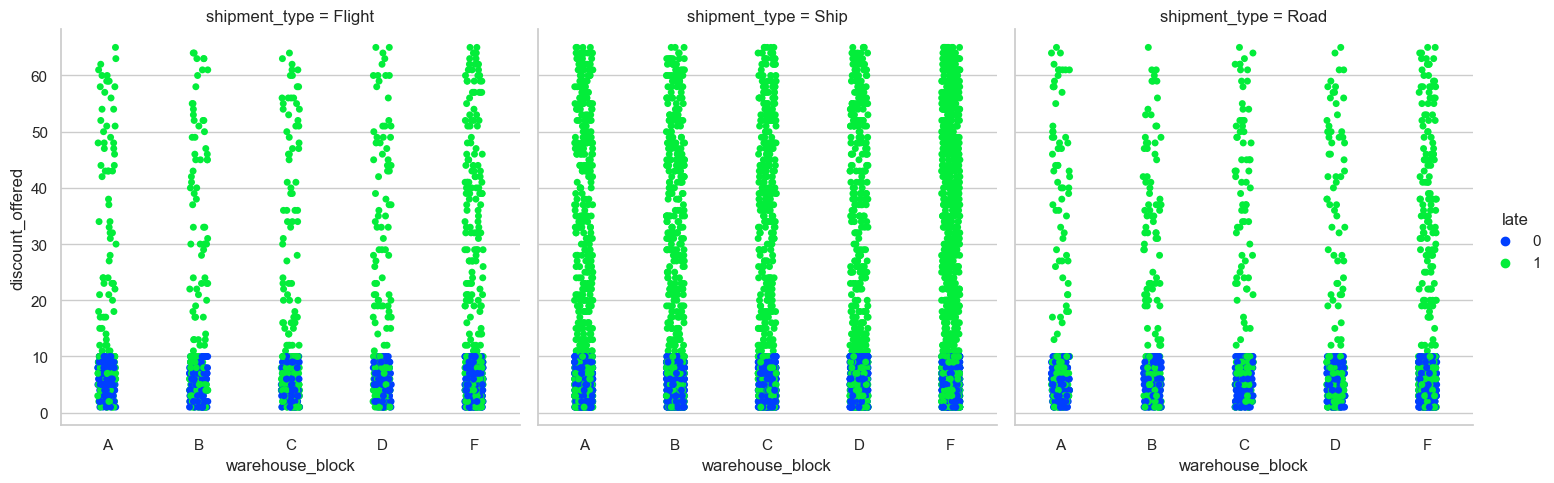

In [962]:
#Categorical Plot -  Sebaran pengiriman telat atau tidak dari feature Diskon yang di kelompokkan terhadap Warehouse dan Jenis Pengiriman
sns.catplot(x='warehouse_block', y='discount_offered', hue='late', col='shipment_type', data=df, order=['A', 'B', 'C', 'D', 'F'])

c:\Users\DGRSZOMBIE315\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



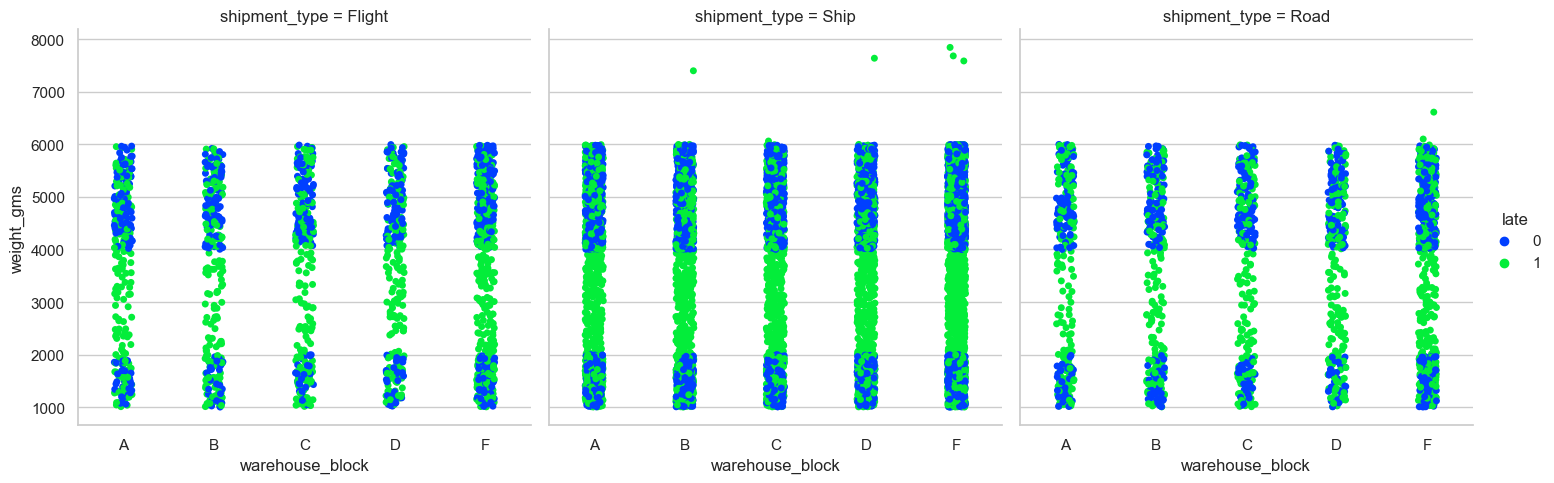

In [963]:
sns.catplot(x='warehouse_block', y='weight_gms', hue='late', col='shipment_type', data=df, order=['A', 'B', 'C', 'D', 'F'])

c:\Users\DGRSZOMBIE315\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



<Figure size 1200x800 with 0 Axes>

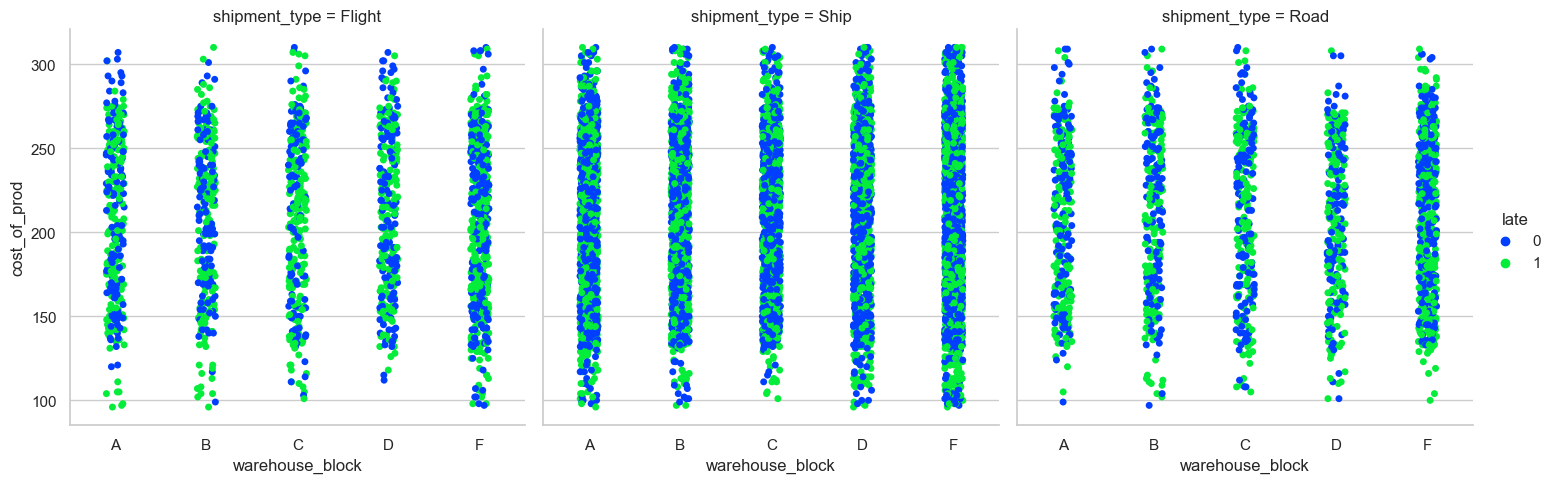

In [964]:
#Categorical Plot -  Sebaran pengiriman telat atau tidak dari feature Harga yang di kelompokkan terhadap Warehouse dan Jenis Pengiriman
plt.figure(figsize=(12, 8))
sns.catplot(x='warehouse_block', y='cost_of_prod', hue='late', col='shipment_type', data=df, order=['A', 'B', 'C', 'D', 'F'])

c:\Users\DGRSZOMBIE315\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



<Figure size 1200x800 with 0 Axes>

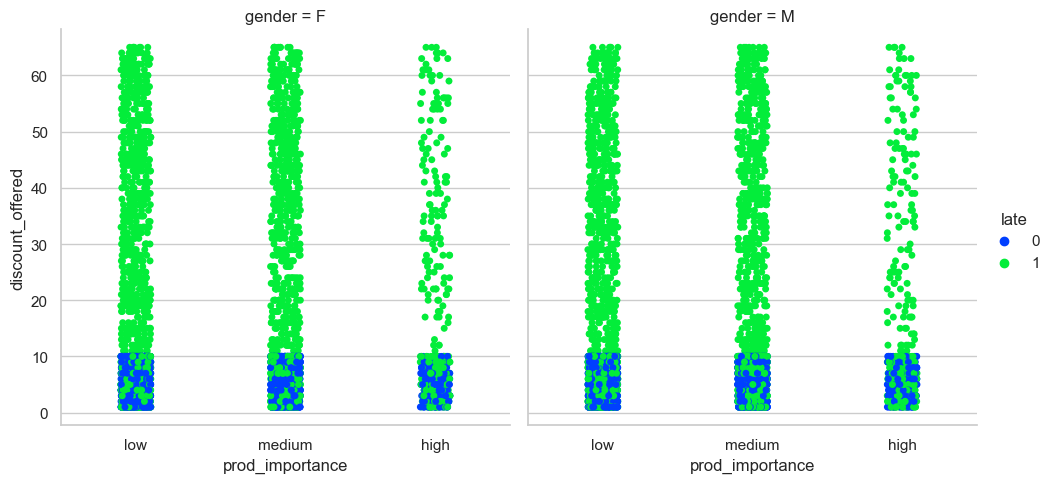

In [965]:
#Categorical Plot -  Sebaran pengiriman telat atau tidak dari feature Diskon yang di kelompokkan terhadap Product Importance dan Gender
plt.figure(figsize=(12, 8))
sns.catplot(x='prod_importance', y='discount_offered', hue='late', col='gender', data=df)

c:\Users\DGRSZOMBIE315\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



<Figure size 1200x800 with 0 Axes>

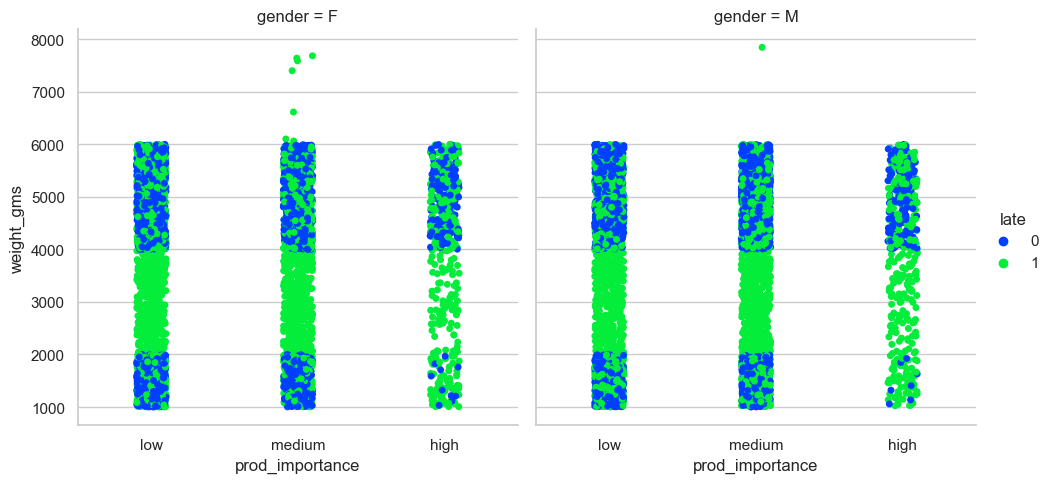

In [966]:
#Categorical Plot -  Sebaran pengiriman telat atau tidak dari feature Berat yang di kelompokkan terhadap Product Importance dan Gender
plt.figure(figsize=(12, 8))
sns.catplot(x='prod_importance', y='weight_gms', hue='late', col='gender', data=df)

c:\Users\DGRSZOMBIE315\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



<Figure size 1200x800 with 0 Axes>

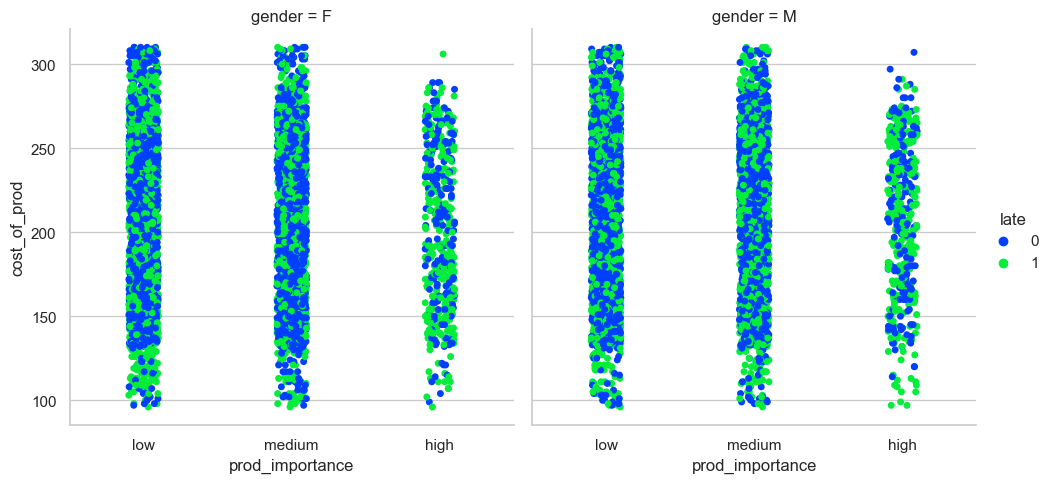

In [967]:
#Categorical Plot -  Sebaran pengiriman telat atau tidak dari feature Harga yang di kelompokkan terhadap Product Importance dan Gender
plt.figure(figsize=(12, 8))
sns.catplot(x='prod_importance', y='cost_of_prod', hue='late', col='gender', data=df)

In [968]:
#Untuk Grup by berdasarkan pengelompokan Diskon
dfdiscount = df[['discount_offered','late']]
discount_cat = []

for index, kolom in dfdiscount.iterrows():
    if kolom['discount_offered'] >=0 and kolom['discount_offered'] <=10:
        discount_cat.append('1 sd 10')
    elif kolom['discount_offered'] >=11 and kolom['discount_offered'] <=20:
        discount_cat.append('11 sd 20')
    elif kolom['discount_offered'] >=21 and kolom['discount_offered'] <=30:
        discount_cat.append('21 sd 30')    
    else:
        discount_cat.append('diatas 30')

        
dfdiscount['discount_cat'] = discount_cat
dfdiscount = dfdiscount.groupby(['discount_cat','late'])['discount_offered'].count().reset_index()
dfdiscount.columns = ['discount_cat', 'late', 'SubTotal']
dfdiscount['Total'] = dfdiscount.groupby('discount_cat')['SubTotal'].transform('sum')
dfdiscount['Late_Percentage'] = round((dfdiscount['SubTotal'] / dfdiscount['Total']) * 100, 2)
dfdiscount[dfdiscount['late']==1]

,discount_cat,late,SubTotal,Total,Late_Percentage
1,1 sd 10,1,3916,8352,46.89
2,11 sd 20,1,496,496,100.00
3,21 sd 30,1,441,441,100.00
4,diatas 30,1,1710,1710,100.00


In [969]:
dfweight = df[['weight_gms','late']]
weight_cat = []

for index, kolom in dfweight.iterrows():
    if kolom['weight_gms']>=0 and kolom['weight_gms']<=2000:
        weight_cat.append('0 sd 2000')
    elif kolom['weight_gms']>=2001 and kolom['weight_gms']<=4000:
        weight_cat.append('2001 sd 4000')    
    else:
        weight_cat.append('4001 sd 6000')

        
dfweight['weight_cat'] = weight_cat
dfweight = dfweight.groupby(['weight_cat','late'])['weight_gms'].count().reset_index()
dfweight.columns = ['weight_cat', 'late', 'SubTotal']
dfweight['Total'] = dfweight.groupby('weight_cat')['SubTotal'].transform('sum')
dfweight['late_Percentage'] = round((dfweight['SubTotal'] / dfweight['Total']) * 100, 2)
dfweight[dfweight['late']==1]

,weight_cat,late,SubTotal,Total,late_Percentage
1,0 sd 2000,1,2199,3245,67.77
3,2001 sd 4000,1,1787,1788,99.94
5,4001 sd 6000,1,2577,5966,43.19


# Dataframe

 - Split the train and test first to prevent data leakage
 - Remove all outliers based on IQR limit 1,5.
 - Do feature encoding and normalization

 Note:
 - 1 is Late, 0 is Not Late
 - Since we dont want false positive, so we should focus on recall

In [970]:
df_model = df.copy()

In [971]:
df_model.drop(columns='late').select_dtypes('int','float').columns

Index(['cust_care_calls', 'rating', 'cost_of_prod', 'prior_purchases',
       'discount_offered', 'weight_gms'],
      dtype='object')

In [972]:
# REMOVE OUTLIERS FUNCTION
def remove_outliers(df):

    print(f'Number of rows before erasing outliers: {len(df)}')

    filtered_entries = np.array([True] * len(df))
    # for col in df.drop(columns='late').select_dtypes('int','float').columns:
    for col in ['prior_purchases']:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        low_limit = Q1 - (IQR * 1.5)
        high_limit = Q3 + (IQR * 1.5)

        filtered_entries = ((df[col] >= low_limit) & (df[col] <= high_limit)) & filtered_entries
        
    df = df[filtered_entries]

    print(f'Number of rows after erasing outliers: {len(df)}')

    return df

#ONE HOT ENCODINF FUNCTION
def encoding(df):

    #One Hot Encoding
    FEwarehouse_ori = pd.get_dummies(df['warehouse_block'], prefix = 'Warehouse', dtype='int')
    FEshipment_ori = pd.get_dummies(df['shipment_type'], prefix = 'Shipment', dtype='int')
    FEGender_ori = pd.get_dummies(df['gender'], prefix = 'Gender', dtype='int')

    #Ordinal Encoding
    Importance_ordinal_ori = pd.Categorical(df['prod_importance'], categories = df['prod_importance'].unique(), ordered = True)
    labels, unique = pd.factorize(Importance_ordinal_ori, sort = True)

    #Concat One Hot Encoding
    df = pd.concat([df, FEwarehouse_ori], axis = 1)
    df = pd.concat([df, FEshipment_ori], axis = 1)
    df = pd.concat([df, FEGender_ori], axis = 1)
    df['Importance'] = labels

    df = df.drop(columns = ['ID', 'warehouse_block', 'shipment_type', 'gender', 'prod_importance'])

    return df

#NORMALIZATION FUNCTION
def normalize_data(df, column_names):

    for i in range(len(column_names)):
        df[column_names[i]] = MinMaxScaler().fit_transform(df[column_names[i]].values.reshape(len(df), 1))

    return df

### Preprocess Data (remove outliers, feature encoding, normalization)

In [974]:
#Splitting Feature & Target

## REMOVE OUTLIERS X and Y
df_model_x = remove_outliers(df_model)

df_model_x_p1 = df_model.drop(columns = ['late', 'late count']) #feature
y = df_model['late'] #target

#Splitting data Train & data Test
xtrain, xtest, ytrain, ytest = train_test_split(df_model_x_p1, y, test_size = 0.3, random_state = 33)

## ENCODING X and Y
xtrain_p2 = encoding(xtrain)
xtest_p2 = encoding(xtest)

## NORMALIZATION X and Y
num_dfori = xtrain_p2.select_dtypes(include = ['int', 'float']).drop(columns=['Importance'])
nums_ori = num_dfori.columns
print(nums_ori)

xtrain_p3 = normalize_data(xtrain_p2, nums_ori)
xtest_p3 = normalize_data(xtest_p2, nums_ori)

Number of rows before erasing outliers: 10999
Number of rows after erasing outliers: 9996
Index(['cust_care_calls', 'rating', 'cost_of_prod', 'prior_purchases',
       'discount_offered', 'weight_gms', 'Warehouse_A', 'Warehouse_B',
       'Warehouse_C', 'Warehouse_D', 'Warehouse_F', 'Shipment_Flight',
       'Shipment_Road', 'Shipment_Ship', 'Gender_F', 'Gender_M'],
      dtype='object')


# Modeling

In [976]:
# DEFINE MODEL
modelLR = LogisticRegression(random_state=33)
modelXGB = XGBClassifier(random_state = 3)
modelAB = AdaBoostClassifier(random_state = 3)
modelRF = RandomForestClassifier(random_state = 10)

In [1003]:
#Model Evaluation function
def model_evaluation(pred, ytest):

    accuracy =  round(accuracy_score(ytest, pred), 3)
    precision = round(precision_score(ytest, pred), 3)
    recall = round(recall_score(ytest, pred), 3)
    f1_score_val = round(f1_score(ytest, pred), 3)

    print('Accuracy :', accuracy)
    print('Precision :', precision)
    print('Recall :', recall)
    print('F-1Score :', f1_score_val)

    return accuracy, precision, recall, f1_score_val


def view_confusion_matrix(ytest, y_pred):
    cf_matrix = confusion_matrix(ytest, y_pred)

    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]

    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]

    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]

    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [978]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                10999 non-null  object
 1   warehouse_block   10999 non-null  object
 2   shipment_type     10999 non-null  object
 3   cust_care_calls   10999 non-null  int64 
 4   rating            10999 non-null  int64 
 5   cost_of_prod      10999 non-null  int64 
 6   prior_purchases   10999 non-null  int64 
 7   prod_importance   10999 non-null  object
 8   gender            10999 non-null  object
 9   discount_offered  10999 non-null  int64 
 10  weight_gms        10999 non-null  int64 
 11  late              10999 non-null  int64 
 12  late count        10999 non-null  bool  
dtypes: bool(1), int64(7), object(5)
memory usage: 1.0+ MB


## Model Logistic Regression

In [979]:

modelLR.fit(xtrain_p3, ytrain)

LogisticRegression(random_state=33)

In [1004]:
y_pred_trainLR = modelLR.predict(xtrain_p3)
y_predLR = modelLR.predict(xtest_p3)
accuracy_lr, precision_lr, recall_lr, f1_lr = model_evaluation(y_predLR, ytest)

Accuracy : 0.656
Precision : 0.707
Recall : 0.735
F-1Score : 0.721


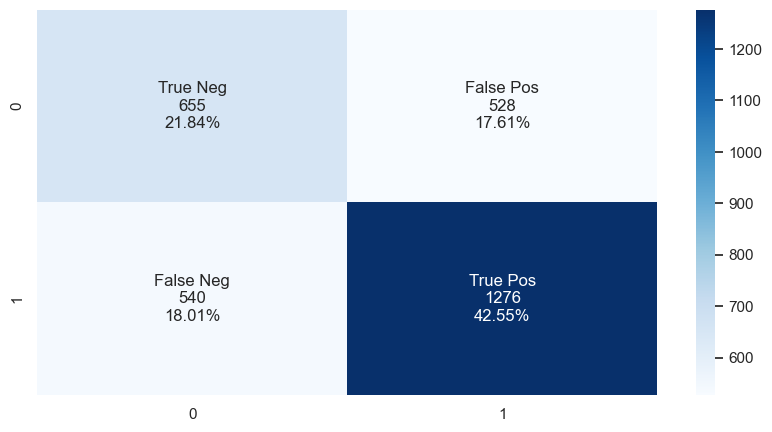

In [ ]:
view_confusion_matrix(ytest, y_predLR)

## Model XGBoost

In [983]:
modelXGB.fit(xtrain_p3, ytrain)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=3, ...)

In [1006]:
y_pred_trainXGB = modelXGB.predict(xtrain_p3)
y_pred_XGB = modelXGB.predict(xtest_p3)
accuracy_xgb, precision_xgb, recall_xgb, f1_xgb = model_evaluation(y_pred_XGB, ytest)

Accuracy : 0.668
Precision : 0.745
Recall : 0.687
F-1Score : 0.714


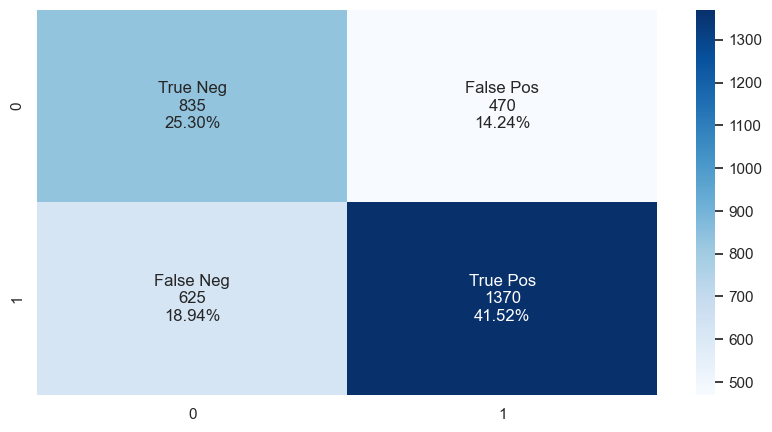

In [985]:
view_confusion_matrix(ytest, y_pred_XGB)

## Model AdaBoost

In [986]:
modelAB.fit(xtrain_p3, ytrain)

AdaBoostClassifier(random_state=3)

In [1007]:
y_pred_trainAB = modelAB.predict(xtrain_p3)
y_pred_AB = modelAB.predict(xtest_p3)
accuracy_ada, precision_ada, recall_ada, f1_ada =model_evaluation(y_pred_AB, ytest)

Accuracy : 0.679
Precision : 0.784
Recall : 0.648
F-1Score : 0.709


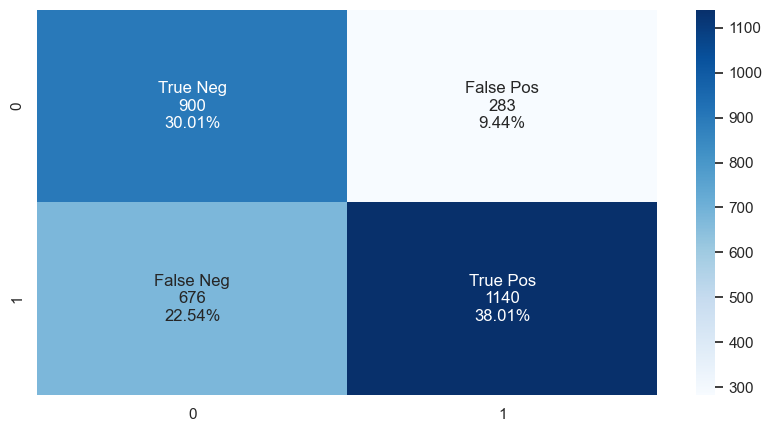

In [ ]:
view_confusion_matrix(ytest, y_pred_AB)

## Model Random Forest

In [988]:
modelRF.fit(xtrain_p3, ytrain)

RandomForestClassifier(random_state=10)

In [1008]:
y_pred_trainRF = modelRF.predict(xtrain_p3)
y_pred_RF = modelRF.predict(xtest_p3)
accuracy_rf, precision_rf, recall_rf, f1_rf = model_evaluation(y_pred_RF, ytest)

Accuracy : 0.673
Precision : 0.759
Recall : 0.674
F-1Score : 0.714


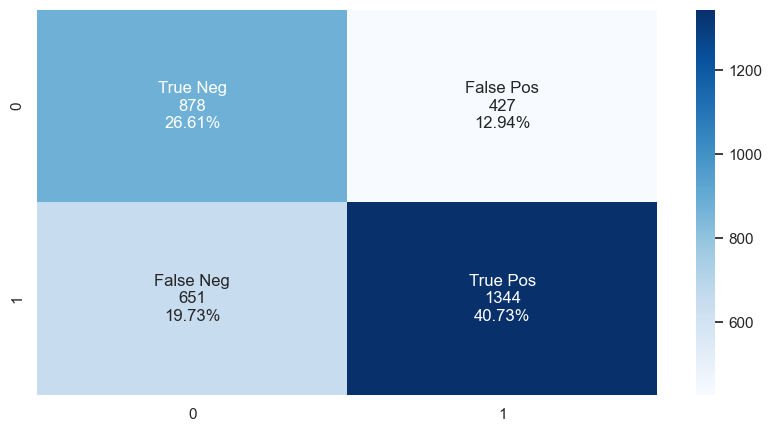

In [990]:
view_confusion_matrix(ytest, y_pred_RF)

# Conclusion

In [993]:
df_model_x['late'].value_counts()

late
1    5972
0    4024
Name: count, dtype: int64

In [1010]:
scores = pd.DataFrame({'Model':['LogReg', 'XGBoost', 'Adaboost', 'Random Forest'],
             'Accuracy':[accuracy_lr, accuracy_xgb, accuracy_ada, accuracy_rf],
             'Recall': [ recall_lr, recall_xgb, recall_ada, recall_rf],
             'Precision': [precision_lr, precision_xgb, precision_ada, precision_rf],
             'F1 Score': [f1_lr, f1_xgb, f1_ada, f1_rf]})

scores

,Model,Accuracy,Recall,Precision,F1 Score
0,LogReg,0.656,0.735,0.707,0.721
1,XGBoost,0.668,0.687,0.745,0.714
2,Adaboost,0.679,0.648,0.784,0.709
3,Random Forest,0.673,0.674,0.759,0.714


- The Only outlier in the prior purchase column is removed, because the result of the model is worse when all outlier was removed, this was maybe caused the data is not learning much variety
- Based on All 4 model, Logistic regression shows the best recall (0.735)
- However based on the accuracy, it is not relativeley far, and also the accuracy is quite low
- And for the precision LR have the lowest score, albeit it is still around 0.7 with ohers
- for the F1 Score, it is not far from the others